## EDA and Tokenize

In [1]:
import pandas as pd

In [2]:
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
yelp = pd.read_csv('yelp_review.csv')
yelp.head()

,Unnamed: 0,business_id,categories,review_id,user_id,stars,useful,text,date,user_review_count
0,0,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57,28
1,1,UQssxfQY7LcLEtagk9ecog,"Pakistani, Indian, Restaurants, Halal",0y3cVL5vdd9zpSDN-kaOIQ,3-1va0IQfK-9tUMzfHWfTA,5,1,I was pleasantly surprised when I dined here l...,2018-01-18 14:53:43,28
2,7,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",_hJu0u6nB-8LIeQJY4Vg4w,KQSRUu4Aapl0hG6eu2v8iw,4,1,This is my favorite bakery in Chinatown! I usu...,2018-03-17 23:47:25,759
3,10,2rQFgavS-942RapZTBSBTw,"Italian, Pizza, Restaurants, American (Traditi...",pWJZOVlRYQoDth22olrjjg,KQSRUu4Aapl0hG6eu2v8iw,1,1,Edit: I don't know what happened. The service ...,2018-04-02 00:24:09,759
4,12,UNWb37aMC3nuWdszceGMxg,"Restaurants, Pakistani, Indian",bTQSVdKqplptyJaynbBWJA,KQSRUu4Aapl0hG6eu2v8iw,3,2,I've ordered delivery and also ate in the rest...,2018-05-12 02:52:28,759


In [4]:
if 'Unnamed: 0' in yelp.columns:
    yelp = yelp.drop('Unnamed: 0', axis=1)
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641534 entries, 0 to 641533
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   business_id        641534 non-null  object
 1   categories         641534 non-null  object
 2   review_id          641534 non-null  object
 3   user_id            641534 non-null  object
 4   stars              641534 non-null  int64 
 5   useful             641534 non-null  int64 
 6   text               641534 non-null  object
 7   date               641534 non-null  object
 8   user_review_count  641534 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 44.1+ MB


In [5]:
yelp.iloc[3]

business_id                                     2rQFgavS-942RapZTBSBTw
categories           Italian, Pizza, Restaurants, American (Traditi...
review_id                                       pWJZOVlRYQoDth22olrjjg
user_id                                         KQSRUu4Aapl0hG6eu2v8iw
stars                                                                1
useful                                                               1
text                 Edit: I don't know what happened. The service ...
date                                               2018-04-02 00:24:09
user_review_count                                                  759
Name: 3, dtype: object

EDA


In [6]:
yelp.describe()

,stars,useful,user_review_count
count,641534.000000,641534.000000,641534.000000
mean,3.936473,2.671886,251.476399
std,1.254529,4.689409,506.754421
min,1.000000,1.000000,20.000000
25%,3.000000,1.000000,48.000000
50%,4.000000,1.000000,110.000000
75%,5.000000,3.000000,256.000000
max,5.000000,325.000000,17473.000000


In [7]:
numerical_feats = yelp.dtypes[yelp.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))
categorical_feats = yelp.dtypes[yelp.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  3
Number of Categorical features:  6


In [8]:
print(yelp[numerical_feats].columns)
print("*"*100)
print(yelp[categorical_feats].columns)

Index(['stars', 'useful', 'user_review_count'], dtype='object')
****************************************************************************************************
Index(['business_id', 'categories', 'review_id', 'user_id', 'text', 'date'], dtype='object')


In [9]:
yelp.max()

business_id                                     zznZqH9CiAznbkV6fXyHWA
categories           Yoga, Food, Active Life, Fitness & Instruction...
review_id                                       zzzlQD_iocCwpiCgz5mYRw
user_id                                         zzz-M4QvkEpUWWPL9RTzLA
stars                                                                5
useful                                                             325
text                 這是一家很有氣氛的餐廳  不會很吵鬧 \n很適合浪漫的情侶或溫馨的家庭朋友聚會\n我們點的每...
date                                               2021-12-31 23:49:24
user_review_count                                                17473
dtype: object

In [10]:
temp_df_1 = yelp.copy()
temp_df_1['year'] = pd.DatetimeIndex(temp_df_1['date']).year
temp_df_1.head()
temp_df_1['month'] = pd.DatetimeIndex(temp_df_1['date']).month
temp_df_1.head()
temp_df_1['month_year'] = pd.to_datetime(temp_df_1['date']).dt.to_period('M')
temp_df_1.head()

,business_id,categories,review_id,user_id,stars,useful,text,date,user_review_count,year,month,month_year
0,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57,28,2018,5,2018-05
1,UQssxfQY7LcLEtagk9ecog,"Pakistani, Indian, Restaurants, Halal",0y3cVL5vdd9zpSDN-kaOIQ,3-1va0IQfK-9tUMzfHWfTA,5,1,I was pleasantly surprised when I dined here l...,2018-01-18 14:53:43,28,2018,1,2018-01
2,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",_hJu0u6nB-8LIeQJY4Vg4w,KQSRUu4Aapl0hG6eu2v8iw,4,1,This is my favorite bakery in Chinatown! I usu...,2018-03-17 23:47:25,759,2018,3,2018-03
3,2rQFgavS-942RapZTBSBTw,"Italian, Pizza, Restaurants, American (Traditi...",pWJZOVlRYQoDth22olrjjg,KQSRUu4Aapl0hG6eu2v8iw,1,1,Edit: I don't know what happened. The service ...,2018-04-02 00:24:09,759,2018,4,2018-04
4,UNWb37aMC3nuWdszceGMxg,"Restaurants, Pakistani, Indian",bTQSVdKqplptyJaynbBWJA,KQSRUu4Aapl0hG6eu2v8iw,3,2,I've ordered delivery and also ate in the rest...,2018-05-12 02:52:28,759,2018,5,2018-05


Text(0.5, 1.0, 'text length in different years')

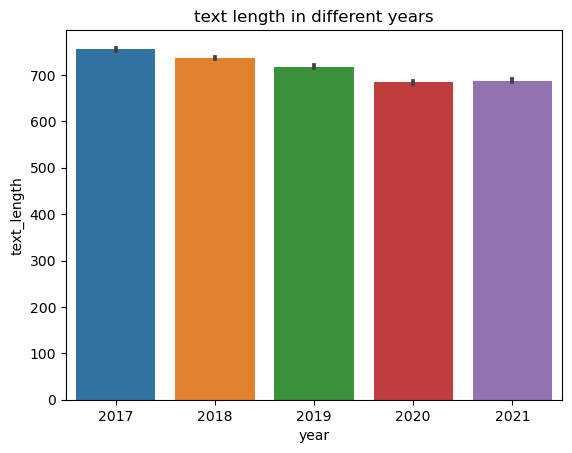

In [11]:
#text length decrease according to the time
temp_df_1['text_length'] = temp_df_1['text'].apply(lambda x: len(x))
sns.barplot(data=temp_df_1, x='year', y= 'text_length')
plt.title('text length in different years')

Text(0.5, 1.0, 'useful condition according to time')

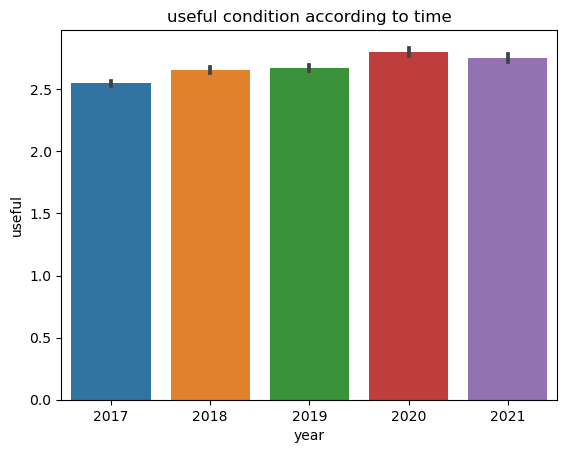

In [12]:
sns.barplot(data=temp_df_1, x='year', y ='useful')
plt.title('useful condition according to time')

Text(0.5, 1.0, 'Distribution of text length')

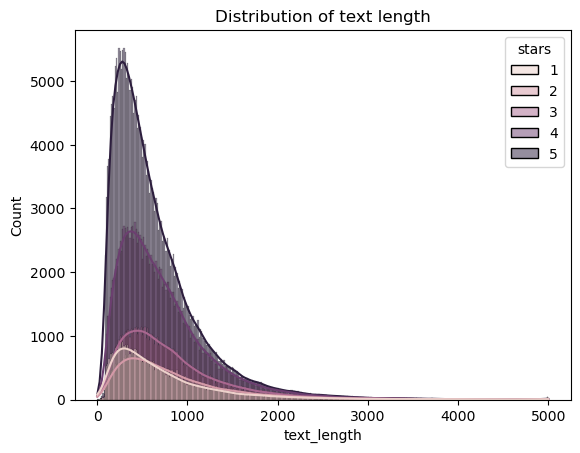

In [13]:
temp_df = yelp.copy()
temp_df['text_length'] = temp_df['text'].apply(lambda x: len(x))
sns.histplot(data=temp_df, x='text_length', hue='stars', kde=True)
plt.title('Distribution of text length')

In [14]:
text = " ".join(review for review in yelp.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 462966372 words in the combination of all review.


### Data Processing and Tokenization/TF-IDF

In [17]:
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
#https://zhuanlan.zhihu.com/p/37175253
#https://blog.csdn.net/u012436149/article/details/79321112
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
# nltk.download('words')
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
def preprocess_text(text, stem=False):
    text = text.lower()
    # delete special characters
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    # delete links
    text = re.sub(r'http\S+', '', text)
    # delete multispaces
    text = re.sub('\s\s+', ' ', text)
    # delete digits
    text = re.sub(r'[0-9]+', '', text)
    # delete stop words
    text = text.split(' ')
    text = ' '.join([word for word in text if not word in STOPWORDS])
#     text = [word for word in text if not word in STOPWORDS]
         
#     engWords = set(nltk.corpus.words.words())
#     text = ' '.join([word.lower() for word in text if word in engWords])
    
    text = remove_stopwords(text)
    if stem:
        stem = SnowballStemmer(language='english')
        text = ' '.join([stem.stem(word) for word in text.split(' ')])
    else:
        lemmatizer = WordNetLemmatizer()
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])
    text = text.strip()
    return text

In [19]:
def tokenize_word(text, stem=True):
    text = text.lower()
    # delete special characters
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    # delete links
    text = re.sub(r'http\S+', '', text)
    # delete multispaces
    text = re.sub('\s\s+', ' ', text)
    # delete digits
    text = re.sub(r'[0-9]+', '', text)
    # delete stop words
    text = text.split(' ')
    text = ' '.join([word for word in text if not word in STOPWORDS])
    
#     engWords = set(nltk.corpus.words.words())
#     text = [word.lower() for word in noPuncWords if word in engWords and \
#                        word not in nltk.corpus.stopwords.words('english')]
    
    text = remove_stopwords(text)
    if stem:
        stem = SnowballStemmer(language='english')
        text = ' '.join([stem.stem(word) for word in text.split(' ')])
    else:
        lemmatizer = WordNetLemmatizer()
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])
    text = text.strip()
    return text.split(' ')

In [20]:
preprocess_text(yelp['text'][0], stem=True)

'order graduat cake niec came absolut perfect come futur event staff nice cake good'

In [21]:
tokenize_word(yelp['text'][0], stem=True)

['order',
 'graduat',
 'cake',
 'niec',
 'came',
 'absolut',
 'perfect',
 'come',
 'futur',
 'event',
 'staff',
 'nice',
 'cake',
 'good']

In [22]:
from tqdm import tqdm

In [23]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/fei/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
import os.path

# if the preprocessed csv not exist in the dir, generate it first
if not os.path.isfile('yelp_review_nostop_punc_engOnly_lem.csv') :
    yelp = pd.read_csv('yelp_review.csv')
    if 'Unnamed: 0' in yelp.columns:
        yelp = yelp.drop('Unnamed: 0', axis=1)
    for i in tqdm(range(len(yelp))):
        yelp.loc[i,'text']  = preprocess_text(yelp.loc[i,'text'], stem=False)
    yelp.to_csv('yelp_review_nostop_punc_engOnly_lem.csv')

In [25]:
yelp = pd.read_csv('yelp_review_nostop_punc_engOnly_lem.csv')

In [26]:
corpus = yelp["text"].apply(str).to_list()

In [27]:
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
    )
X_tfidf = vectorizer.fit_transform(corpus)
X_tfidf.shape

(641534, 65036)

In [28]:
print(f"We find that around {X_tfidf.nnz / np.prod(X_tfidf.shape) * 100:.3f}% of the entries of the X_tfidf matrix are non-zero.")

We find that around 0.074% of the entries of the X_tfidf matrix are non-zero.
